### Number Recognition :
#### Handwritten digit recognition system not only detects scanned images of handwritten digits.Handwritten digit recognition using MNIST dataset is a major project made with the help of Neural Network. It basically detects the scanned images of handwritten digits.

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [10]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=5)

2023-10-25 12:49:49.531460: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 23s 9ms/step - loss: 0.1506 - accuracy: 0.9558
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0506 - accuracy: 0.9846
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0320 - accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0203 - accuracy: 0.9936
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0137 - accuracy: 0.9958


In [14]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy:.2f}')

313/313 - 1s - loss: 0.0456 - accuracy: 0.9868 - 645ms/epoch - 2ms/step
Test accuracy: 0.99


In [15]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


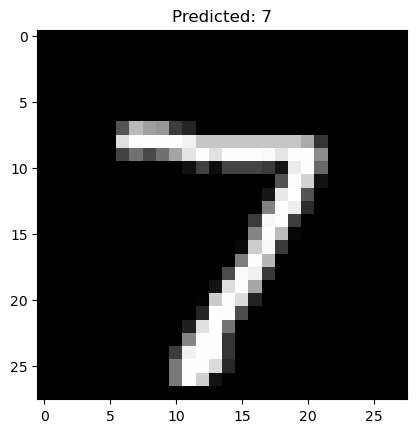

In [16]:
plt.figure()
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f'Predicted: {np.argmax(predictions[0])}')
plt.show()

#### Display all numbers

In [19]:
model.save('mnist_model.h5')
model = keras.models.load_model('Datasets/mnist_model.h5') 
predictions = model.predict(x_test)
num_samples = 10  # Number of test samples to display
plt.figure(figsize=(12, 8))

313/313 [==============================] - 1s 2ms/step


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

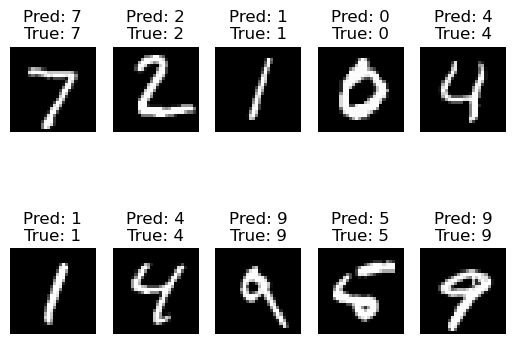

In [20]:
for i in range(num_samples):
    plt.subplot(2, num_samples // 2, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    plt.title(f'Pred: {predicted_label}\nTrue: {true_label}')
    plt.axis('off')

plt.show()